# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 6</span>

In questa esercitazione vogliamo simulare un modello di Ising monodimensionale ed estrarre le quantità termodinamiche in funzione della temperatura.

Il modello di Ising monodimensionale è risolubile analiticamente. Scrivendo l'Hamiltoniana del sistema come:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

possiamo ricavare la funzione di partizione $Z$ che avrà la seguente forma:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

con
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.

Com'è noto dalla meccanica statistica di equilibrio, dalla funzione di partizione possiamo ricavare:

- L'**Energia Interna** per spin (con $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- La **capacità termica** (con $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T} = k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)=
\underset{h=0}= 
k_B N (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- La **Magnetizzazione** (con $h \not= 0$):

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

$$
\frac{M(N,T,h)}{N}=   \frac{k_B T}{N} \dfrac{\partial \ln Z}{\partial h} = \frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

Se $h=0$ la magnetizzazione $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ in quanto nel modello di Ising 1D non è possibile avere transizione di fase e quindi un sistema ferromagnetico.

- La **suscettività magnetica** (con $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

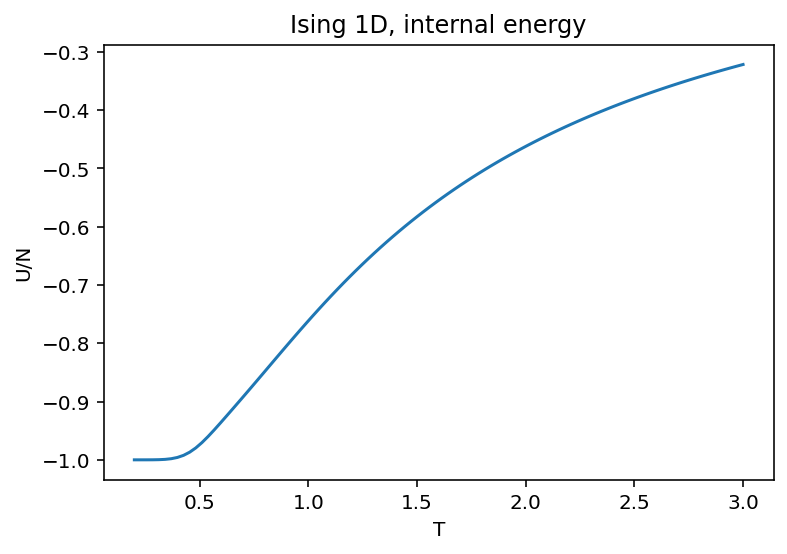

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

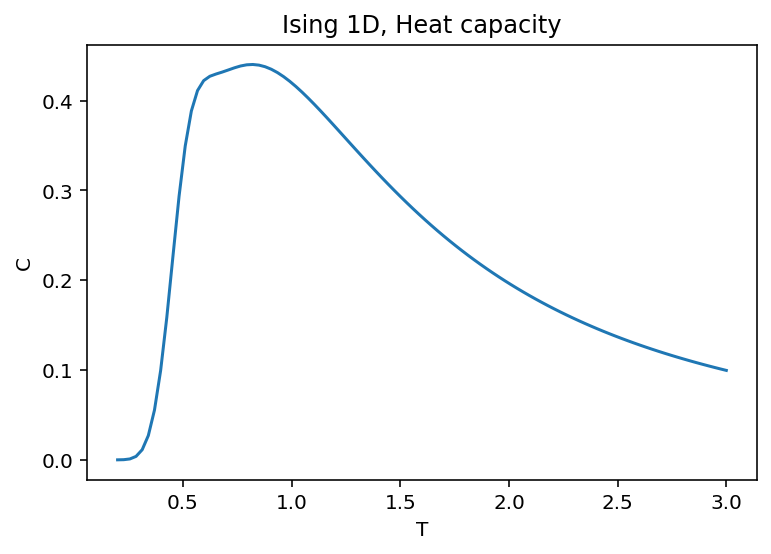

In [2]:
heat_cap=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat_cap)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

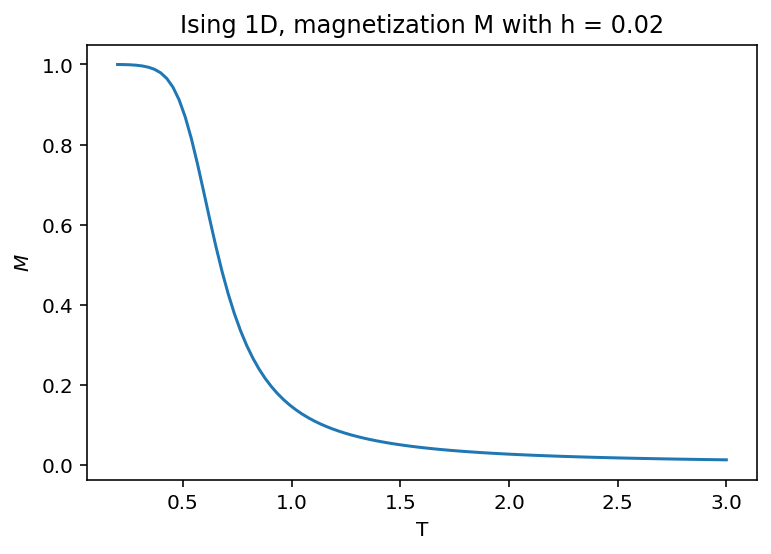

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

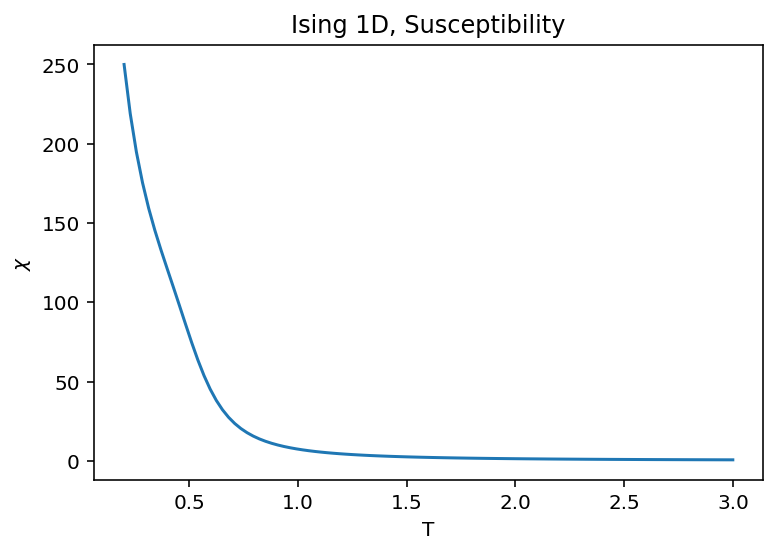

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Esercizio 06.1

In questo esercizio simuliamo il modello di Ising 1D utilizzando il codice fornitoci. In particolare, faremo campionamenti secondo l'algoritmo di Metropolis (cfr Esercitazione 5) e l'algoritmo di Gibbs. Il codice fornito è stato completato con l'implementazione di questi due metodi di campionamento e con il calcolo di 
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

Completato il codice, verifichiamo che l'andamento delle grandezze termodinamiche in funzione di $T$ segua l'andamento descritto dalle formule precedenti nel range $\left[0.5;2.0\right]$, per un sistema composto da $N=50$ spin con $J=1$. I risultati medi e le incertezze statistiche sono stimate tramite data blocking.

#### Campionamento con $M(RT)^{2}$

Per fare la simulazione a campo magnetico nullo inzializziamo il sistema in una certa configurazione, assegnando in maniera casuale i valori $\pm 1$ agli spin del sistema (configurazione di alta temperatura). Potremmo anche partire da un'altra configurazione, quella in cui tutti gli spin hanno lo stesso valore (configurazione di bassa temperatura).
Dopo aver inizializzato il sistema generiamo una nuova configurazione provando a girare uno spin, calcoliamo l'energia del nuovo stato e, tramite l'algoritmo di metropolis, accettiamo o rigettiamo la nuova configurazione. Sfruttando il fatto che l'interazione è a primi vicini, il calcolo del $\Delta E$ per uno spin-flip è molto semplice: $E_{\nu} - E_{\mu} = 2J s_{k} (s_{k+1}+s_{k-1})$. Dopodiché accettiamo la mossa secondo la probabilità di accettazione $A = min\left(1, e^{-\beta \Delta E}\right)$. Un singolo step dell'algoritmo è composto da provare $50$ volte a girare uno spin.

Nel fare la simulazione, dobbiamo ripetere molte volte lo step appena descritto avendo l'accortezza di far equilibrare il sistema. Infatti, fissata la temperatura $T$, non sappiamo se la configurazione iniziale assegnata al sistema è una configurazione di equilibrio per quella temperatura. Per questo vengono eseguiti dapprima $100$ passi di equilibriazione e, a seguire, si fa evolvere il sistema all'equilibrio estraendo di volta in volta le quantità fisiche di interesse per poi calcolarne valori medi e incertezze statistiche tramite data blocking.

#### Campionamento di Gibbs
Il campionamento di Gibbs consiste nella scelta casuale di uno spin, assegnarli un valore e accettare la mossa con probabilità

$$
p(s_{k}=\pm 1) = \frac{1}{1+\exp{[\mp 2\beta J\sum_{i(n.n.k)}s_{i}]}}
$$

Tale modalità di campionare fa sì che allo spin selezionato venga sempre assegnato un valore, che sia $+1$ o $-1$ e quindi il rate di accetazione della mossa è sempre pari a 1. Questa è la principale differenza con il campionamento di Metropolis, dovo solo una certa percentuale di mosse proposte vengono accettate.

Come nel caso precedente, uno step consiste di $50$ *spin flip* e, prima di estrarre i dati, il sistema viene equilibrato facendo 100 passi.

### Grandezze termodinamiche a $T=2.0$

#### Metropolis

I valori medi sono stati ottenuti producendo $10^{5}$ dati, suddivisi in $100$ blocchi. Il rate di accettazione è stato mantenuto attorno al $50\%$.

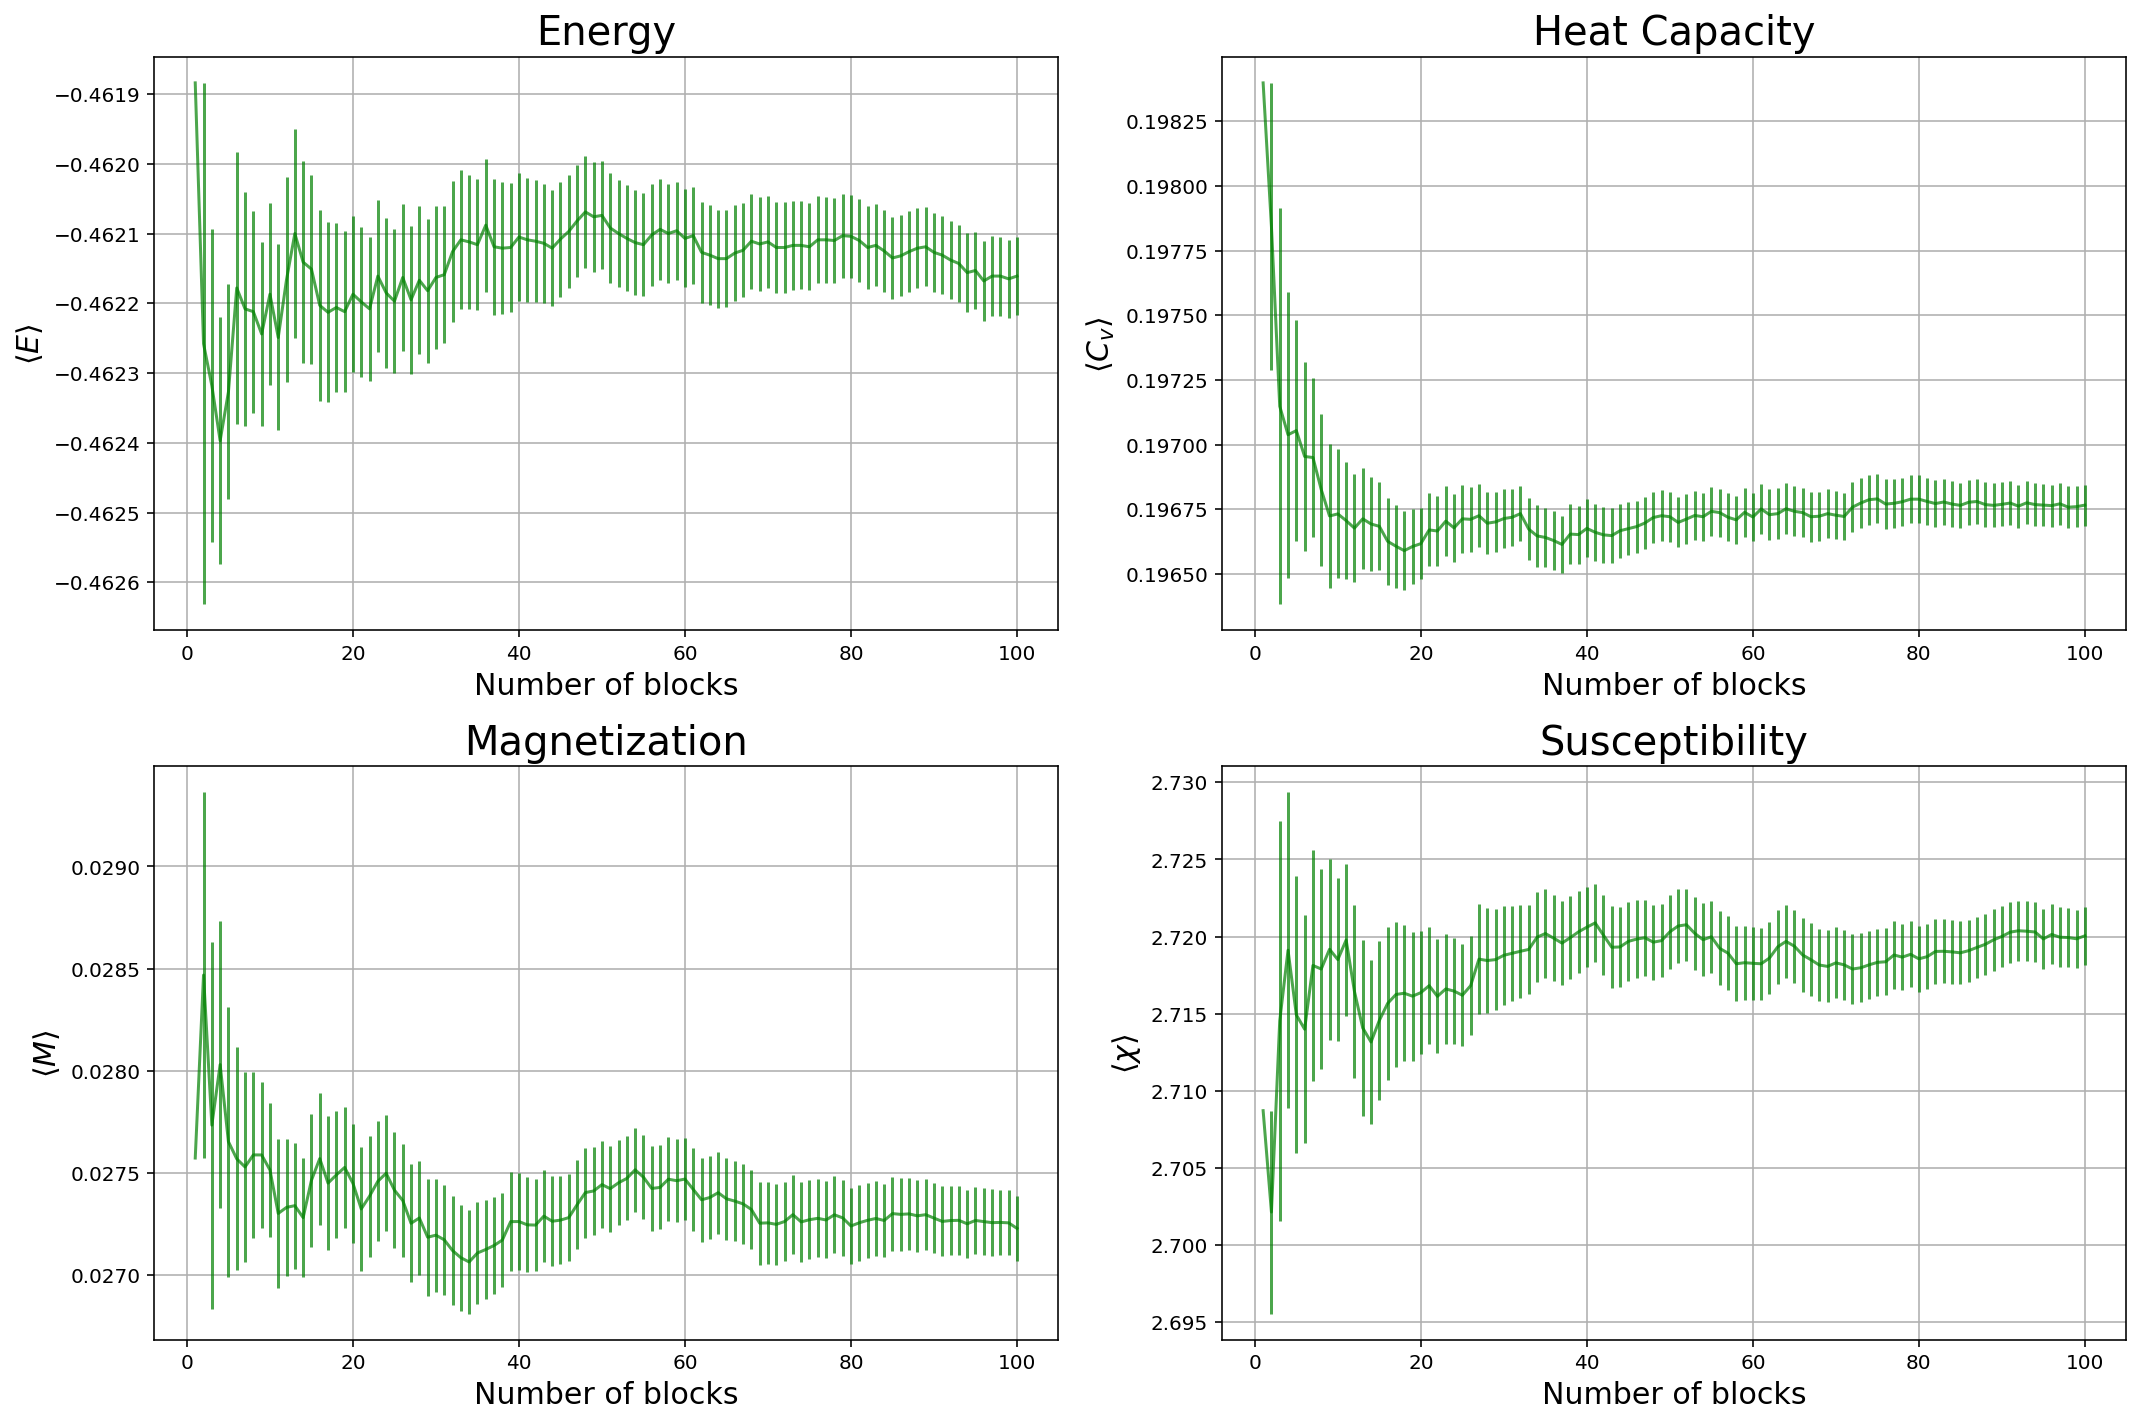

In [5]:
x, ene, err_ene = np.loadtxt("ISING_1D/MRT_ISING_data/output.ene.0", usecols=(0,2,3), unpack='true')
x, heat, err_heat = np.loadtxt("ISING_1D/MRT_ISING_data/output.heat.0", usecols=(0,2,3), unpack='true')
x, chi, err_chi = np.loadtxt("ISING_1D/MRT_ISING_data/output.chi.0", usecols=(0,2,3), unpack='true')
x, mag, err_mag = np.loadtxt("ISING_1D/MRT_ISING_data/output.mag.0", usecols=(0,2,3), unpack='true')

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0][0].errorbar(x,ene,yerr=err_ene, label='MC_ene', color='g',alpha=0.7)
ax[0][0].set_title("Energy",size=20)
ax[0][0].set_xlabel('Number of blocks', size=15)
ax[0][0].set_ylabel(r'$\langle E \rangle$', size=15)
ax[0][0].grid()
ax[0][1].errorbar(x,heat,yerr=err_heat, color='g',alpha=0.7)
ax[0][1].set_title("Heat Capacity", size=20)
ax[0][1].set_xlabel('Number of blocks', size=15)
ax[0][1].set_ylabel(r'$\langle C_{v} \rangle$', size=15)
ax[0][1].grid()
ax[1][1].errorbar(x,chi,yerr=err_chi, color='g',alpha=0.7)
ax[1][1].set_title("Susceptibility",size=20)
ax[1][1].set_xlabel('Number of blocks', size=15)
ax[1][1].set_ylabel(r'$\langle \chi \rangle$', size=15)
ax[1][1].grid()
ax[1][0].errorbar(x,mag,yerr=err_mag, color='g',alpha=0.7)
ax[1][0].set_title("Magnetization",size=20)
ax[1][0].set_xlabel('Number of blocks', size=15)
ax[1][0].set_ylabel(r'$\langle M \rangle$', size=15)
ax[1][0].grid()
fig.tight_layout()

#### Gibbs

Per questa simulazione sono stati utilizzati gli stessi parametri del data blocking usati per l'algoritmo di Metropolis. Chiaramente, il rate di accettazione non è più il $50\%$ bensì il $100\%$.

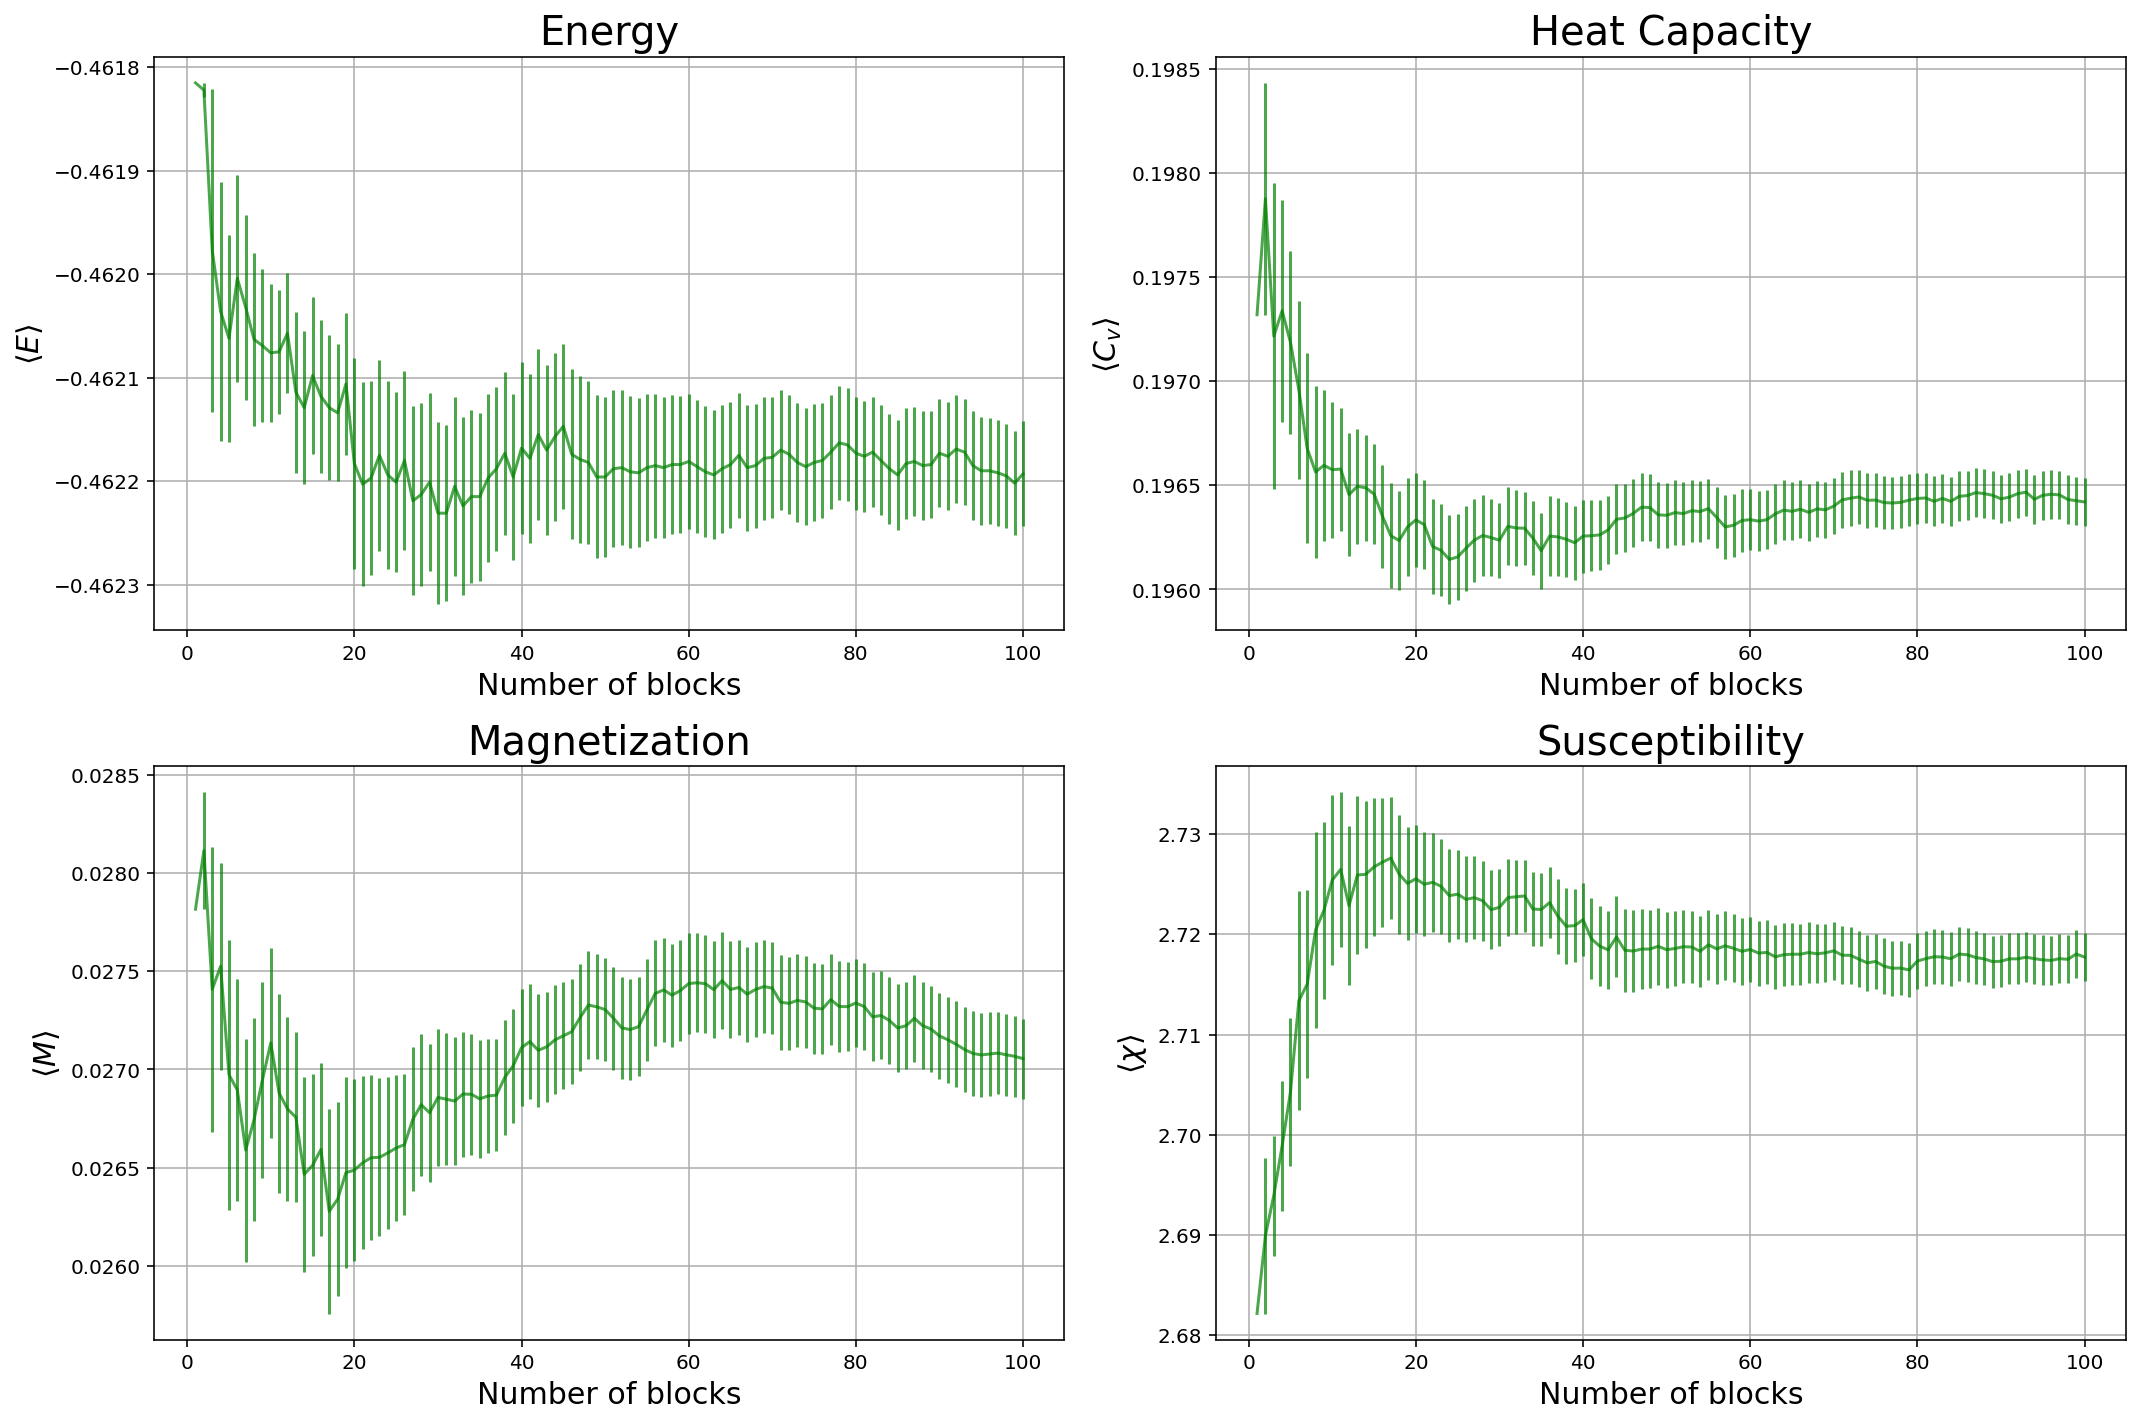

In [6]:
x, ene, err_ene = np.loadtxt("ISING_1D/GIBSS_data/output.ene.0", usecols=(0,2,3), unpack='true')
x, heat, err_heat = np.loadtxt("ISING_1D/GIBSS_data/output.heat.0", usecols=(0,2,3), unpack='true')
x, chi, err_chi = np.loadtxt("ISING_1D/GIBSS_data/output.chi.0", usecols=(0,2,3), unpack='true')
x, mag, err_mag = np.loadtxt("ISING_1D/GIBSS_data/output.mag.0", usecols=(0,2,3), unpack='true')

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0][0].errorbar(x,ene,yerr=err_ene, label='MC_ene', color='g',alpha=0.7)
ax[0][0].set_title("Energy",size=20)
ax[0][0].set_xlabel('Number of blocks', size=15)
ax[0][0].set_ylabel(r'$\langle E \rangle$', size=15)
ax[0][0].grid()
ax[0][1].errorbar(x,heat,yerr=err_heat, color='g',alpha=0.7)
ax[0][1].set_title("Heat Capacity", size=20)
ax[0][1].set_xlabel('Number of blocks', size=15)
ax[0][1].set_ylabel(r'$\langle C_{v} \rangle$', size=15)
ax[0][1].grid()
ax[1][1].errorbar(x,chi,yerr=err_chi, color='g',alpha=0.7)
ax[1][1].set_title("Susceptibility",size=20)
ax[1][1].set_xlabel('Number of blocks', size=15)
ax[1][1].set_ylabel(r'$\langle \chi \rangle$', size=15)
ax[1][1].grid()
ax[1][0].errorbar(x,mag,yerr=err_mag, color='g',alpha=0.7)
ax[1][0].set_title("Magnetization",size=20)
ax[1][0].set_xlabel('Number of blocks', size=15)
ax[1][0].set_ylabel(r'$\langle M \rangle$', size=15)
ax[1][0].grid()
fig.tight_layout()

Di seguito facciamo un confronto tra i risultati ottenuti tramite i due algoritmi.

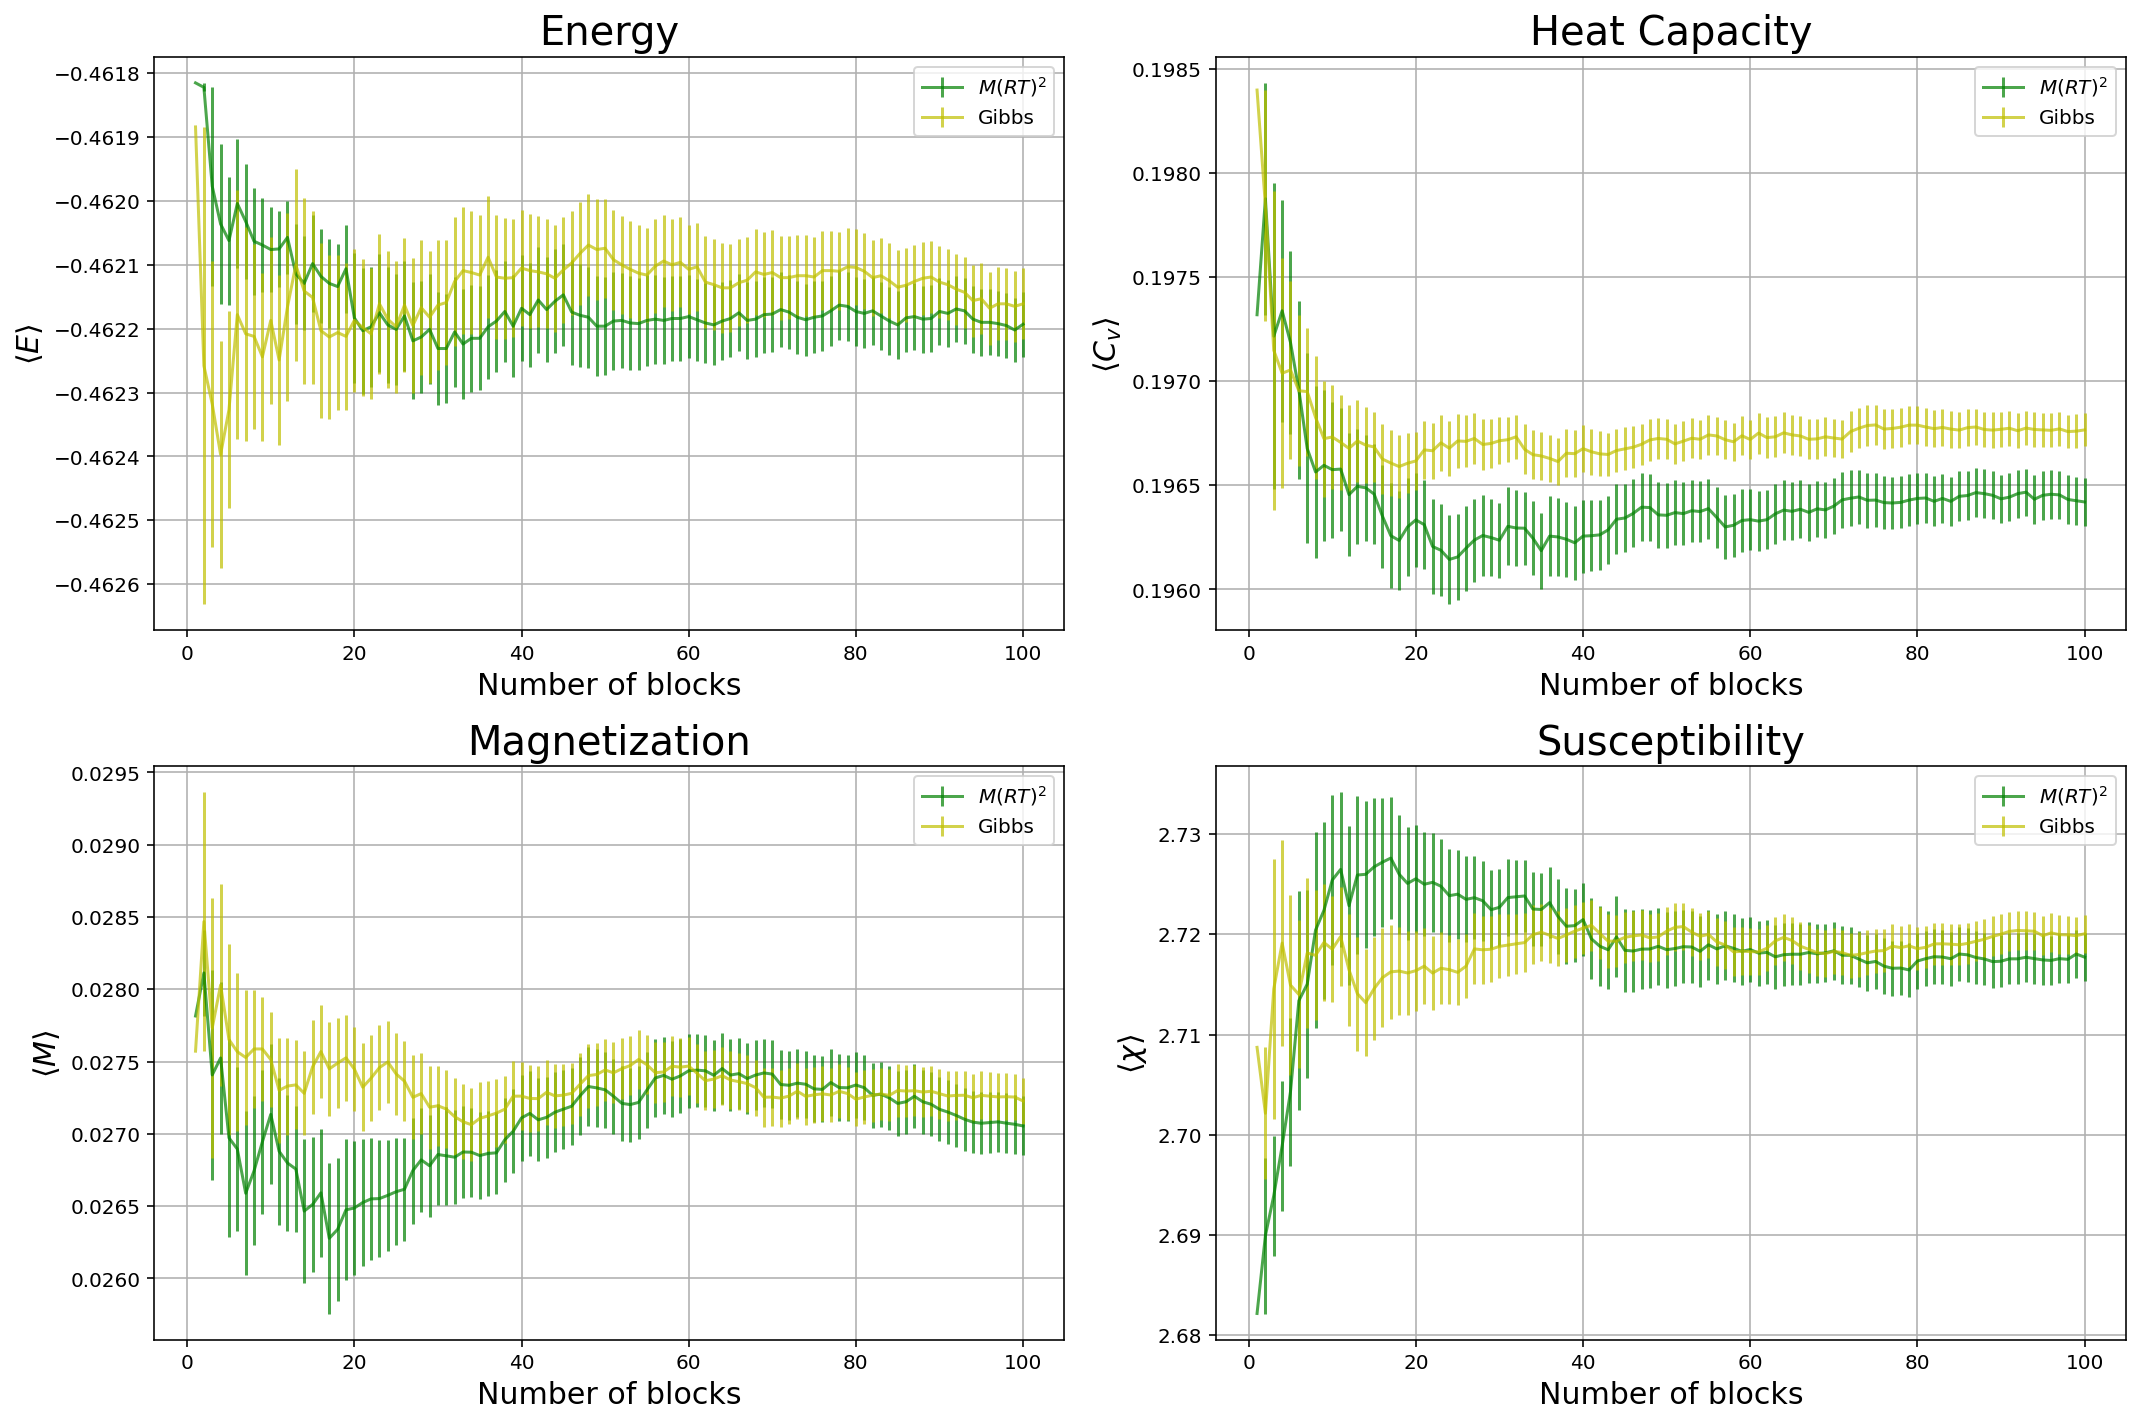

In [7]:
x, ene, err_ene = np.loadtxt("ISING_1D/GIBSS_data//output.ene.0", usecols=(0,2,3), unpack='true')
heat, err_heat = np.loadtxt("ISING_1D/GIBSS_data//output.heat.0", usecols=(2,3), unpack='true')
chi, err_chi = np.loadtxt("ISING_1D/GIBSS_data//output.chi.0", usecols=(2,3), unpack='true')
mag, err_mag = np.loadtxt("ISING_1D/GIBSS_data//output.mag.0", usecols=(2,3), unpack='true')
ene_met, err_ene_met = np.loadtxt("ISING_1D/MRT_ISING_data/output.ene.0", usecols=(2,3), unpack='true')
heat_met, err_heat_met = np.loadtxt("ISING_1D/MRT_ISING_data/output.heat.0", usecols=(2,3), unpack='true')
chi_met, err_chi_met = np.loadtxt("ISING_1D/MRT_ISING_data/output.chi.0", usecols=(2,3), unpack='true')
mag_met, err_mag_met = np.loadtxt("ISING_1D/MRT_ISING_data/output.mag.0", usecols=(2,3), unpack='true')

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0][0].errorbar(x,ene,yerr=err_ene, label=r'$M(RT)^{2}$', color='g',alpha=0.7)
ax[0][0].errorbar(x,ene_met,yerr=err_ene_met, label='Gibbs', color='y',alpha=0.7)
ax[0][0].set_title("Energy",size=20)
ax[0][0].set_xlabel('Number of blocks', size=15)
ax[0][0].set_ylabel(r'$\langle E \rangle$', size=15)
ax[0][0].grid()
ax[0][0].legend()
ax[0][1].errorbar(x,heat,yerr=err_heat, label=r'$M(RT)^{2}$', color='g',alpha=0.7)
ax[0][1].errorbar(x,heat_met,yerr=err_heat_met, label='Gibbs', color='y',alpha=0.7)
ax[0][1].set_title("Heat Capacity", size=20)
ax[0][1].set_xlabel('Number of blocks', size=15)
ax[0][1].set_ylabel(r'$\langle C_{v} \rangle$', size=15)
ax[0][1].grid()
ax[0][1].legend()
ax[1][1].errorbar(x,chi,yerr=err_chi, label=r'$M(RT)^{2}$', color='g',alpha=0.7)
ax[1][1].errorbar(x,chi_met,yerr=err_chi_met, label='Gibbs', color='y',alpha=0.7)
ax[1][1].set_title("Susceptibility",size=20)
ax[1][1].set_xlabel('Number of blocks', size=15)
ax[1][1].set_ylabel(r'$\langle \chi \rangle$', size=15)
ax[1][1].grid()
ax[1][1].legend()
ax[1][0].errorbar(x,mag,yerr=err_mag, label=r'$M(RT)^{2}$', color='g',alpha=0.7)
ax[1][0].errorbar(x,mag_met,yerr=err_mag_met, label='Gibbs', color='y',alpha=0.7)
ax[1][0].set_title("Magnetization",size=20)
ax[1][0].set_xlabel('Number of blocks', size=15)
ax[1][0].set_ylabel(r'$\langle M \rangle$', size=15)
ax[1][0].grid()
ax[1][0].legend()

fig.tight_layout()

Dai grafici appena riportati possiamo osservare che in generale c'è buon accordo tra i risultati ottenuti con i due metodi di campionamento. Tuttavia, per la capacità termica osserviamo una discrepanza significativa, in quanto lo scostamento è maggiore dell'incertezza statistica. Ciò mostra come tramite l'algoritmo di metropolis le fluttuazioni dell'energia siano minori rispetto al campionamento ottenuto tramite Gibbs.  

### Grandezze termodinamiche in funzione di $T$

#### Metropolis

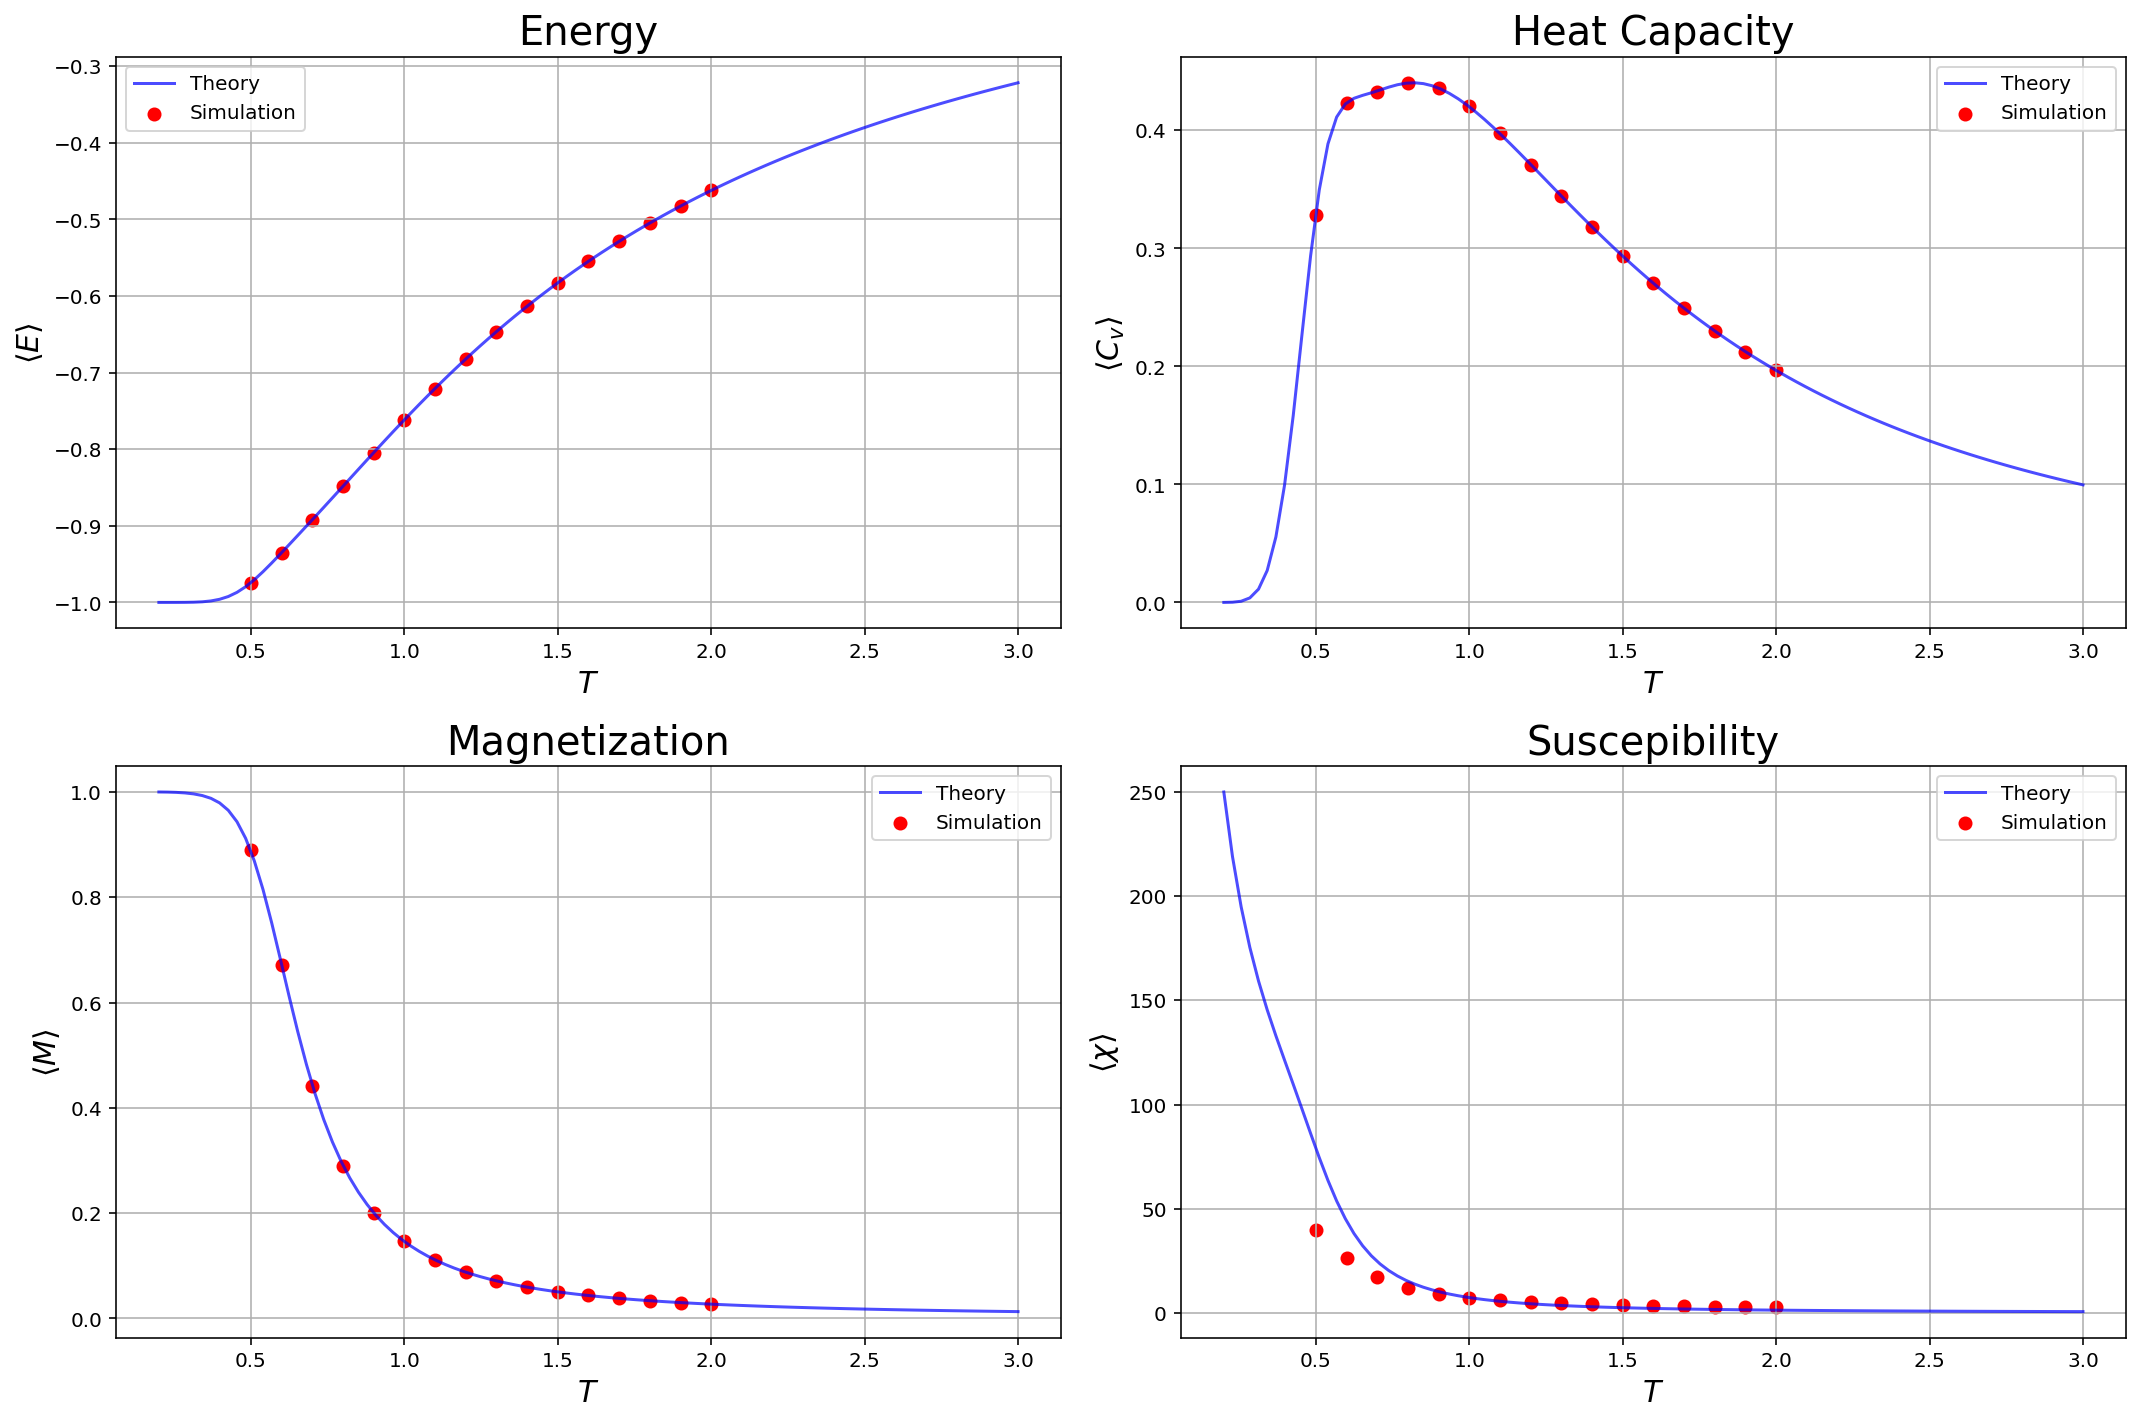

In [8]:
x, ene, err_ene = np.loadtxt("ISING_1D/MRT_ISING_data/ave_output.ene.0", usecols=(0,2,3), unpack='true')
heat, err_heat = np.loadtxt("ISING_1D/MRT_ISING_data/ave_output.heat.0", usecols=(2,3), unpack='true')
chi, err_chi = np.loadtxt("ISING_1D/MRT_ISING_data/ave_output.chi.0", usecols=(2,3), unpack='true')
mag, err_mag = np.loadtxt("ISING_1D/MRT_ISING_data/ave_output.mag.0", usecols=(2,3), unpack='true')

fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].plot(T,e, label='Theory', color='b',alpha=0.7)
ax[0][0].scatter(x,ene, label='Simulation', color='r')
ax[0][0].set_title("Energy", size=20)
ax[0][0].set_xlabel('$T$', size=15)
ax[0][0].set_ylabel(r'$\langle E \rangle$', size=15)
ax[0][0].grid()
ax[0][0].legend()
ax[0][1].scatter(x,heat, label='Simulation', color='r')
ax[0][1].plot(T,heat_cap, label='Theory', color='b',alpha=0.7)
ax[0][1].set_title("Heat Capacity", size=20)
ax[0][1].set_xlabel('$T$', size=15)
ax[0][1].set_ylabel(r'$\langle C_{v} \rangle$', size=15)
ax[0][1].grid()
ax[0][1].legend()
ax[1][0].scatter(x,mag, label='Simulation', color='r')
ax[1][0].plot(T,M, label='Theory', color='b',alpha=0.7)
ax[1][0].set_title("Magnetization", size=20)
ax[1][0].set_xlabel('$T$', size=15)
ax[1][0].set_ylabel(r'$\langle M \rangle$', size=15)
ax[1][0].grid()
ax[1][0].legend()
ax[1][1].scatter(x,chi, label='Simulation', color='r')
ax[1][1].plot(T,X, label='Theory', color='b',alpha=0.7)
ax[1][1].set_title("Suscepibility", size=20)
ax[1][1].set_xlabel('$T$', size=15)
ax[1][1].set_ylabel(r'$\langle \chi \rangle$', size=15)
ax[1][1].grid()
ax[1][1].legend()
fig.tight_layout()

#### Gibbs

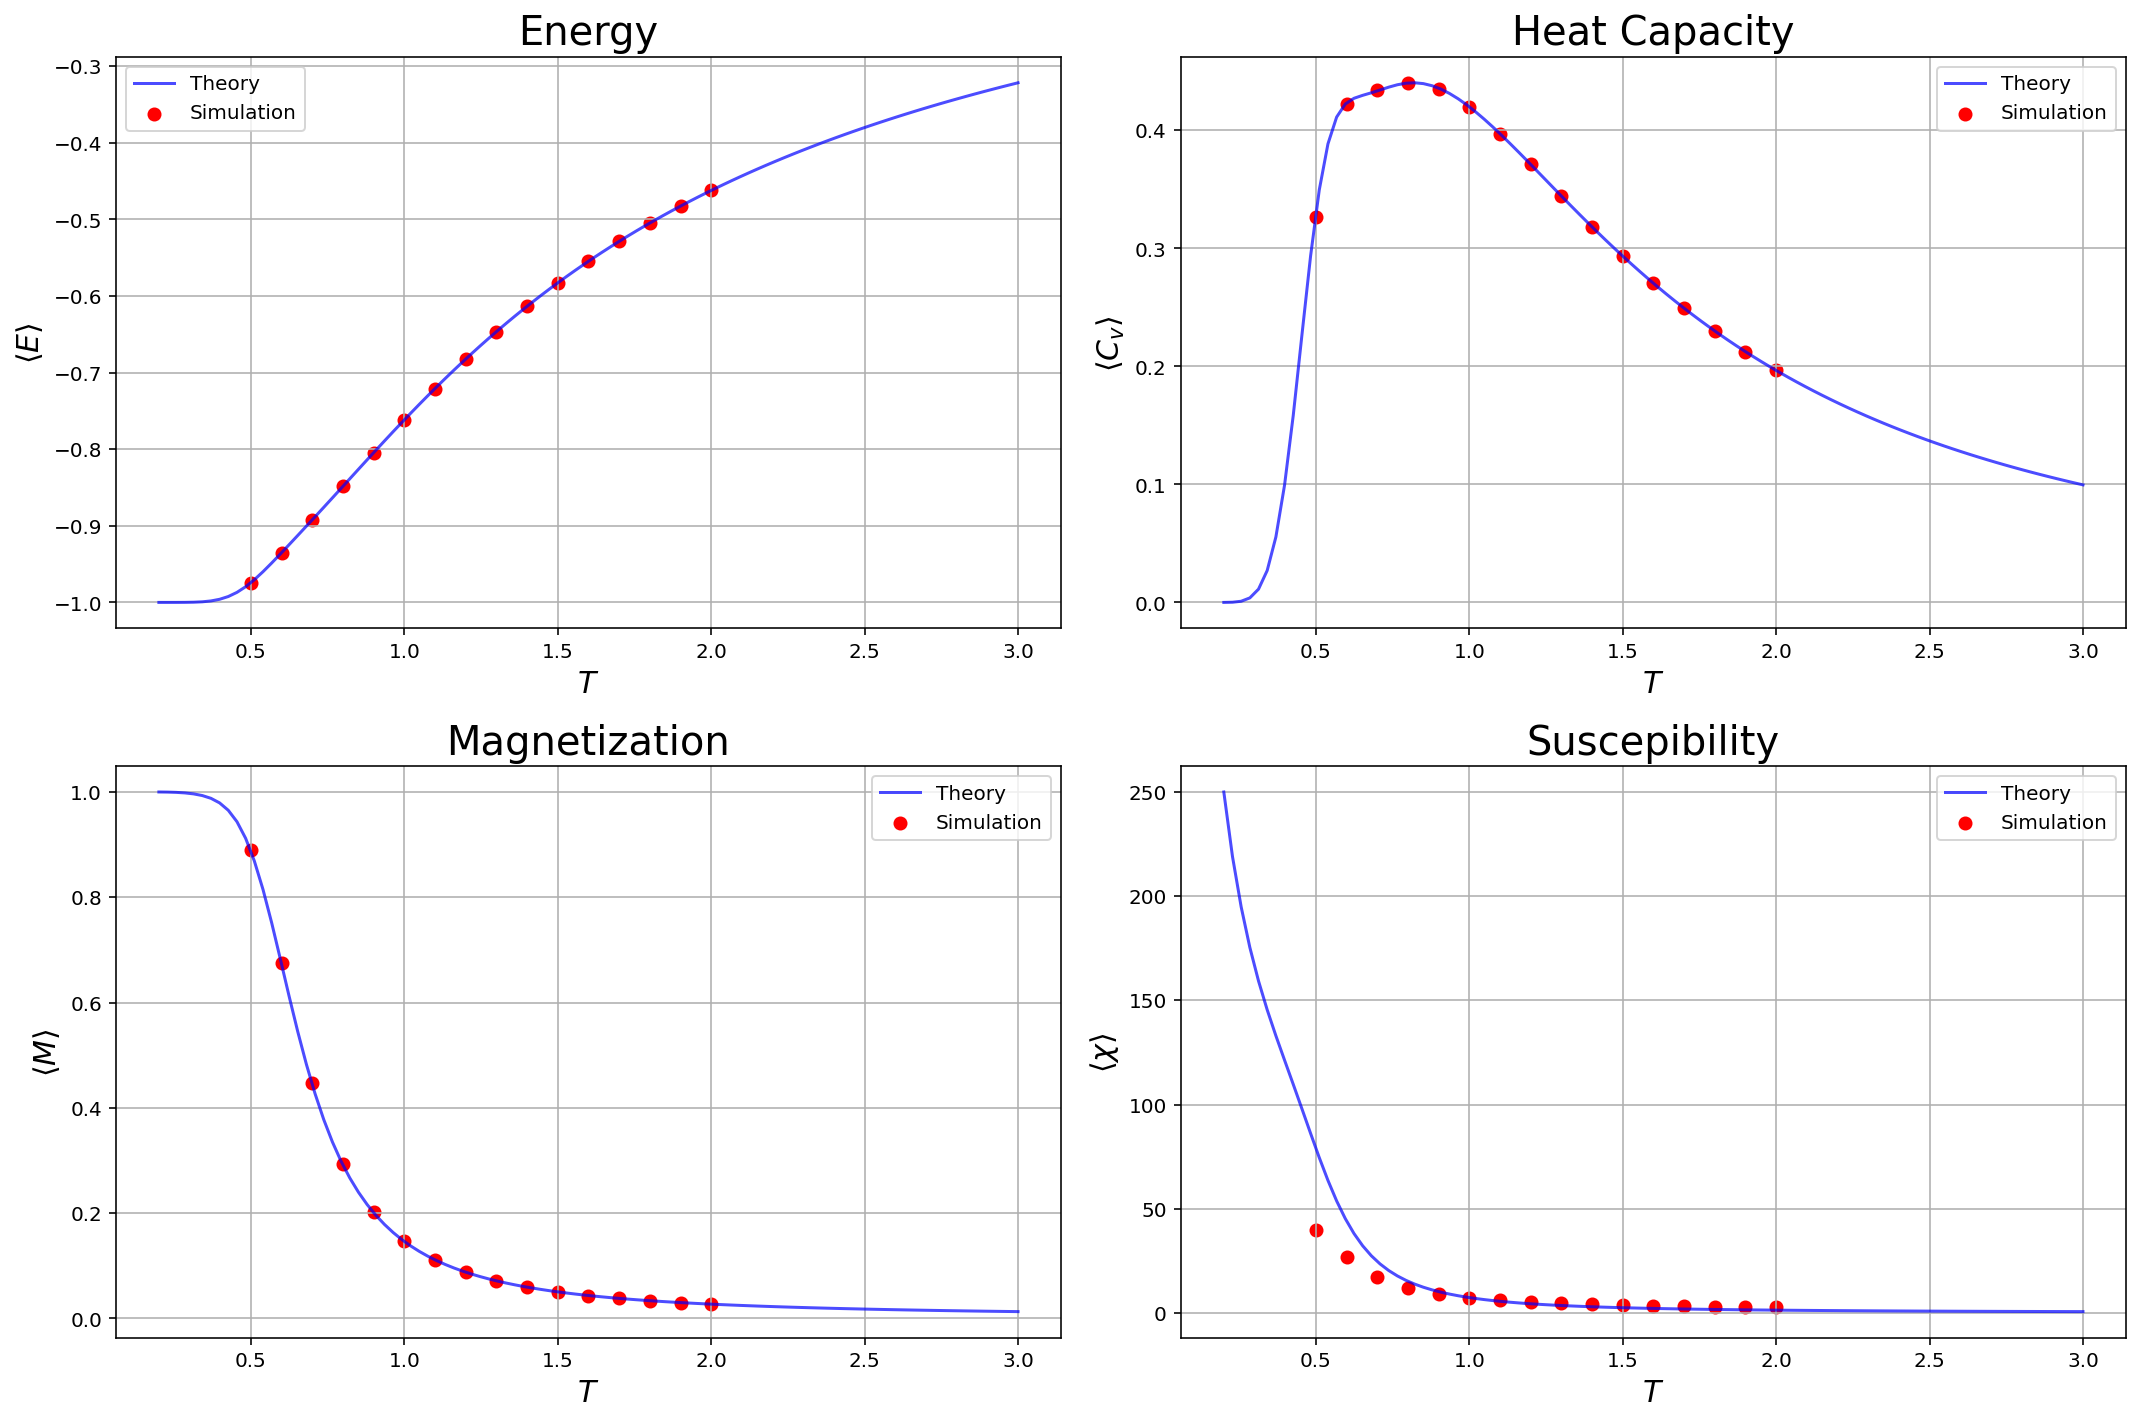

In [9]:
x, ene, err_ene = np.loadtxt("ISING_1D/GIBSS_data/ave_output.ene.0", usecols=(0,2,3), unpack='true')
heat, err_heat = np.loadtxt("ISING_1D/GIBSS_data/ave_output.heat.0", usecols=(2,3), unpack='true')
chi, err_chi = np.loadtxt("ISING_1D/GIBSS_data/ave_output.chi.0", usecols=(2,3), unpack='true')
mag, err_mag = np.loadtxt("ISING_1D/GIBSS_data/ave_output.mag.0", usecols=(2,3), unpack='true')

fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].plot(T,e, label='Theory', color='b',alpha=0.7)
ax[0][0].scatter(x,ene, label='Simulation', color='r')
ax[0][0].set_title("Energy", size=20)
ax[0][0].set_xlabel('$T$', size=15)
ax[0][0].set_ylabel(r'$\langle E \rangle$', size=15)
ax[0][0].grid()
ax[0][0].legend()
ax[0][1].scatter(x,heat, label='Simulation', color='r')
ax[0][1].plot(T,heat_cap, label='Theory', color='b',alpha=0.7)
ax[0][1].set_title("Heat Capacity", size=20)
ax[0][1].set_xlabel('$T$', size=15)
ax[0][1].set_ylabel(r'$\langle C_{v} \rangle$', size=15)
ax[0][1].grid()
ax[0][1].legend()
ax[1][0].scatter(x,mag, label='Simulation', color='r')
ax[1][0].plot(T,M, label='Theory', color='b',alpha=0.7)
ax[1][0].set_title("Magnetization", size=20)
ax[1][0].set_xlabel('$T$', size=15)
ax[1][0].set_ylabel(r'$\langle M \rangle$', size=15)
ax[1][0].grid()
ax[1][0].legend()
ax[1][1].scatter(x,chi, label='Simulation', color='r')
ax[1][1].plot(T,X, label='Theory', color='b',alpha=0.7)
ax[1][1].set_title("Suscepibility", size=20)
ax[1][1].set_xlabel('$T$', size=15)
ax[1][1].set_ylabel(r'$\langle \chi \rangle$', size=15)
ax[1][1].grid()
ax[1][1].legend()
fig.tight_layout()